In [1]:
import pandas as pd
# from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Importing the data
data = pd.read_csv("...\income_evaluation.csv")
data.columns = data.columns.str.replace(' ','')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Creating data label
data['income'][data['income']==' <=50K']=0
data['income'][data['income']==' >50K']=1
data['income'] = data['income'].astype('int')
data['income'].value_counts()

C:\Users\whyle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\whyle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    24720
1     7841
Name: income, dtype: int64

In [4]:
data = data[data['occupation']!=' ?']

# Encoding the variables
d = defaultdict(preprocessing.LabelEncoder)
fit = data.apply(lambda x: d[x.name].fit_transform(x))
data= data.apply(lambda x: d[x.name].transform(x))

In [5]:
data.groupby(['occupation'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
0,3770.0,0.134483,0.341216,0.0,0.0,0.0,0.0,1.0
1,9.0,0.111111,0.333333,0.0,0.0,0.0,0.0,1.0
2,4099.0,0.226641,0.418709,0.0,0.0,0.0,0.0,1.0
3,4066.0,0.484014,0.499806,0.0,0.0,0.0,1.0,1.0
4,994.0,0.115694,0.320019,0.0,0.0,0.0,0.0,1.0
5,1370.0,0.062774,0.242644,0.0,0.0,0.0,0.0,1.0
6,2002.0,0.124875,0.330660,0.0,0.0,0.0,0.0,1.0
7,3295.0,0.041578,0.199653,0.0,0.0,0.0,0.0,1.0
8,149.0,0.006711,0.081923,0.0,0.0,0.0,0.0,1.0


In [6]:
# Simple grid search cross validation using just max_depth
Y_train = data['income']
X_train = data.drop('income',axis=1)

clf = DecisionTreeClassifier(random_state=0)
parameter_grid = {'max_depth': [5,6,7,8,9,10,11,12]}


cross_validation = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=-1,
                           verbose=0)

grid_search.fit(X_train, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8502830860159258
Best parameters: {'max_depth': 8}


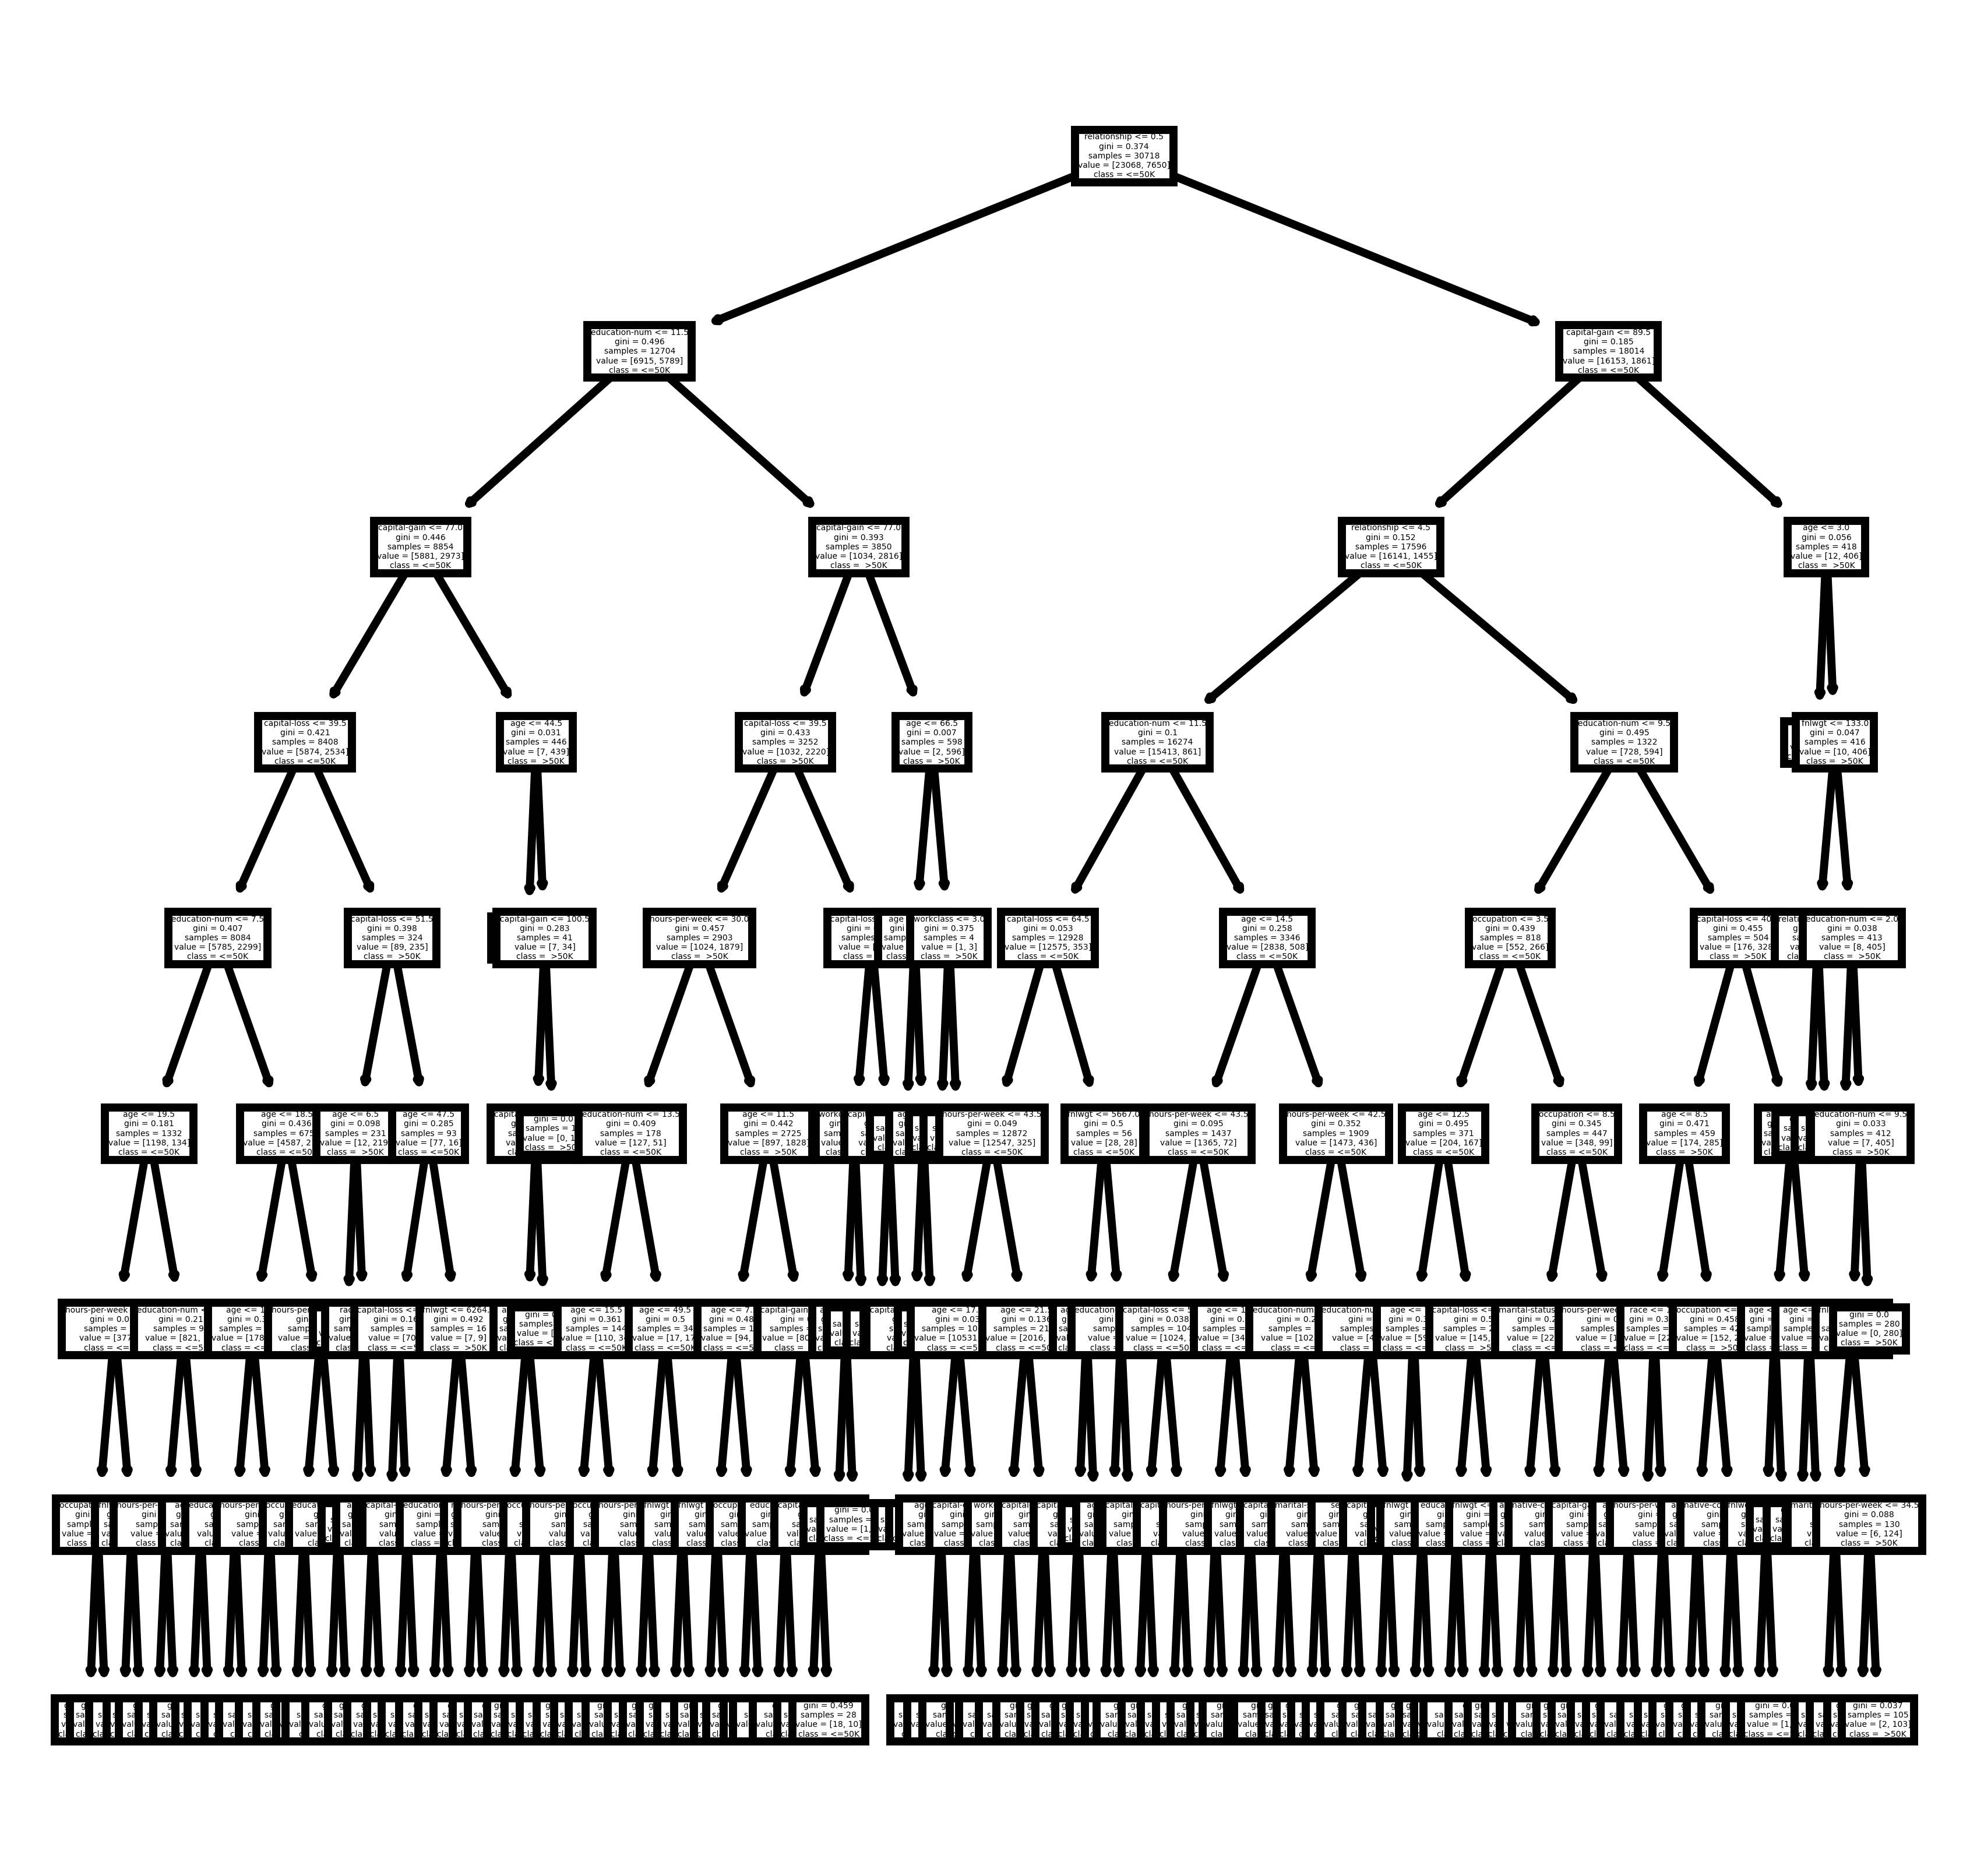

In [7]:
# Visualizing the decision tree with the schema
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(grid_search.best_estimator_,
               feature_names = X_train.columns, 
               class_names= ['<=50K',' >50K']);


[Text(193.48151785714285, 205.35999999999999, 'relationship <= 0.5\ngini = 0.374\nsamples = 30718\nvalue = [23068, 7650]\nclass = <=50K'),
 Text(103.67839285714285, 181.2, 'education-num <= 11.5\ngini = 0.496\nsamples = 12704\nvalue = [6915, 5789]\nclass = <=50K'),
 Text(63.073928571428574, 157.04, 'capital-gain <= 77.0\ngini = 0.446\nsamples = 8854\nvalue = [5881, 2973]\nclass = <=50K'),
 Text(41.65071428571429, 132.88, 'capital-loss <= 39.5\ngini = 0.421\nsamples = 8408\nvalue = [5874, 2534]\nclass = <=50K'),
 Text(25.50857142857143, 108.72, 'education-num <= 7.5\ngini = 0.407\nsamples = 8084\nvalue = [5785, 2299]\nclass = <=50K'),
 Text(12.754285714285714, 84.56, 'age <= 19.5\ngini = 0.181\nsamples = 1332\nvalue = [1198, 134]\nclass = <=50K'),
 Text(6.377142857142857, 60.400000000000006, 'hours-per-week <= 48.0\ngini = 0.083\nsamples = 394\nvalue = [377, 17]\nclass = <=50K'),
 Text(3.1885714285714286, 36.24000000000001, 'occupation <= 0.5\ngini = 0.06\nsamples = 325\nvalue = [315, 1

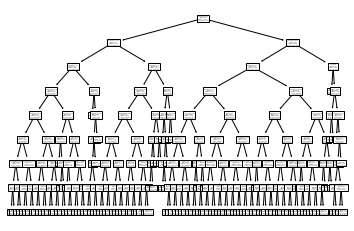

In [8]:
# Printing the tree schema in text form
tree.plot_tree(grid_search.best_estimator_,feature_names = X_train.columns, 
               class_names= ['<=50K',' >50K'] ,)

In [9]:
# Using a different encoding
data1

,occupation,occ2
0,0,2
1,1,4
2,2,6
3,3,8
4,4,10
5,5,12
6,6,14
7,7,13
8,8,11
9,9,9


In [10]:
# Replacing occupation column with occ2
data = pd.merge(data, data1, on = 'occupation', how='left')
data = data.drop('occupation', axis=1)

In [11]:
data.groupby(['occ2'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
occ2,,,,,,,,
1,1597.0,0.200376,0.400407,0.0,0.0,0.0,0.0,1.0
2,3770.0,0.134483,0.341216,0.0,0.0,0.0,0.0,1.0
3,928.0,0.304957,0.460637,0.0,0.0,0.0,1.0,1.0
4,9.0,0.111111,0.333333,0.0,0.0,0.0,0.0,1.0
5,3650.0,0.269315,0.443665,0.0,0.0,0.0,1.0,1.0
6,4099.0,0.226641,0.418709,0.0,0.0,0.0,0.0,1.0
7,649.0,0.325116,0.468779,0.0,0.0,0.0,1.0,1.0
8,4066.0,0.484014,0.499806,0.0,0.0,0.0,1.0,1.0
9,4140.0,0.449034,0.497456,0.0,0.0,0.0,1.0,1.0


In [12]:
# Simple grid search cross validation using just max_depth
Y_train = data['income']
X_train = data.drop('income',axis=1)

clf = DecisionTreeClassifier(random_state=0)
parameter_grid = {'max_depth': [5,6,7,8,9,10,11,12]}


cross_validation = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=-1,
                           verbose=0)

grid_search.fit(X_train, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8529525847085436
Best parameters: {'max_depth': 10}


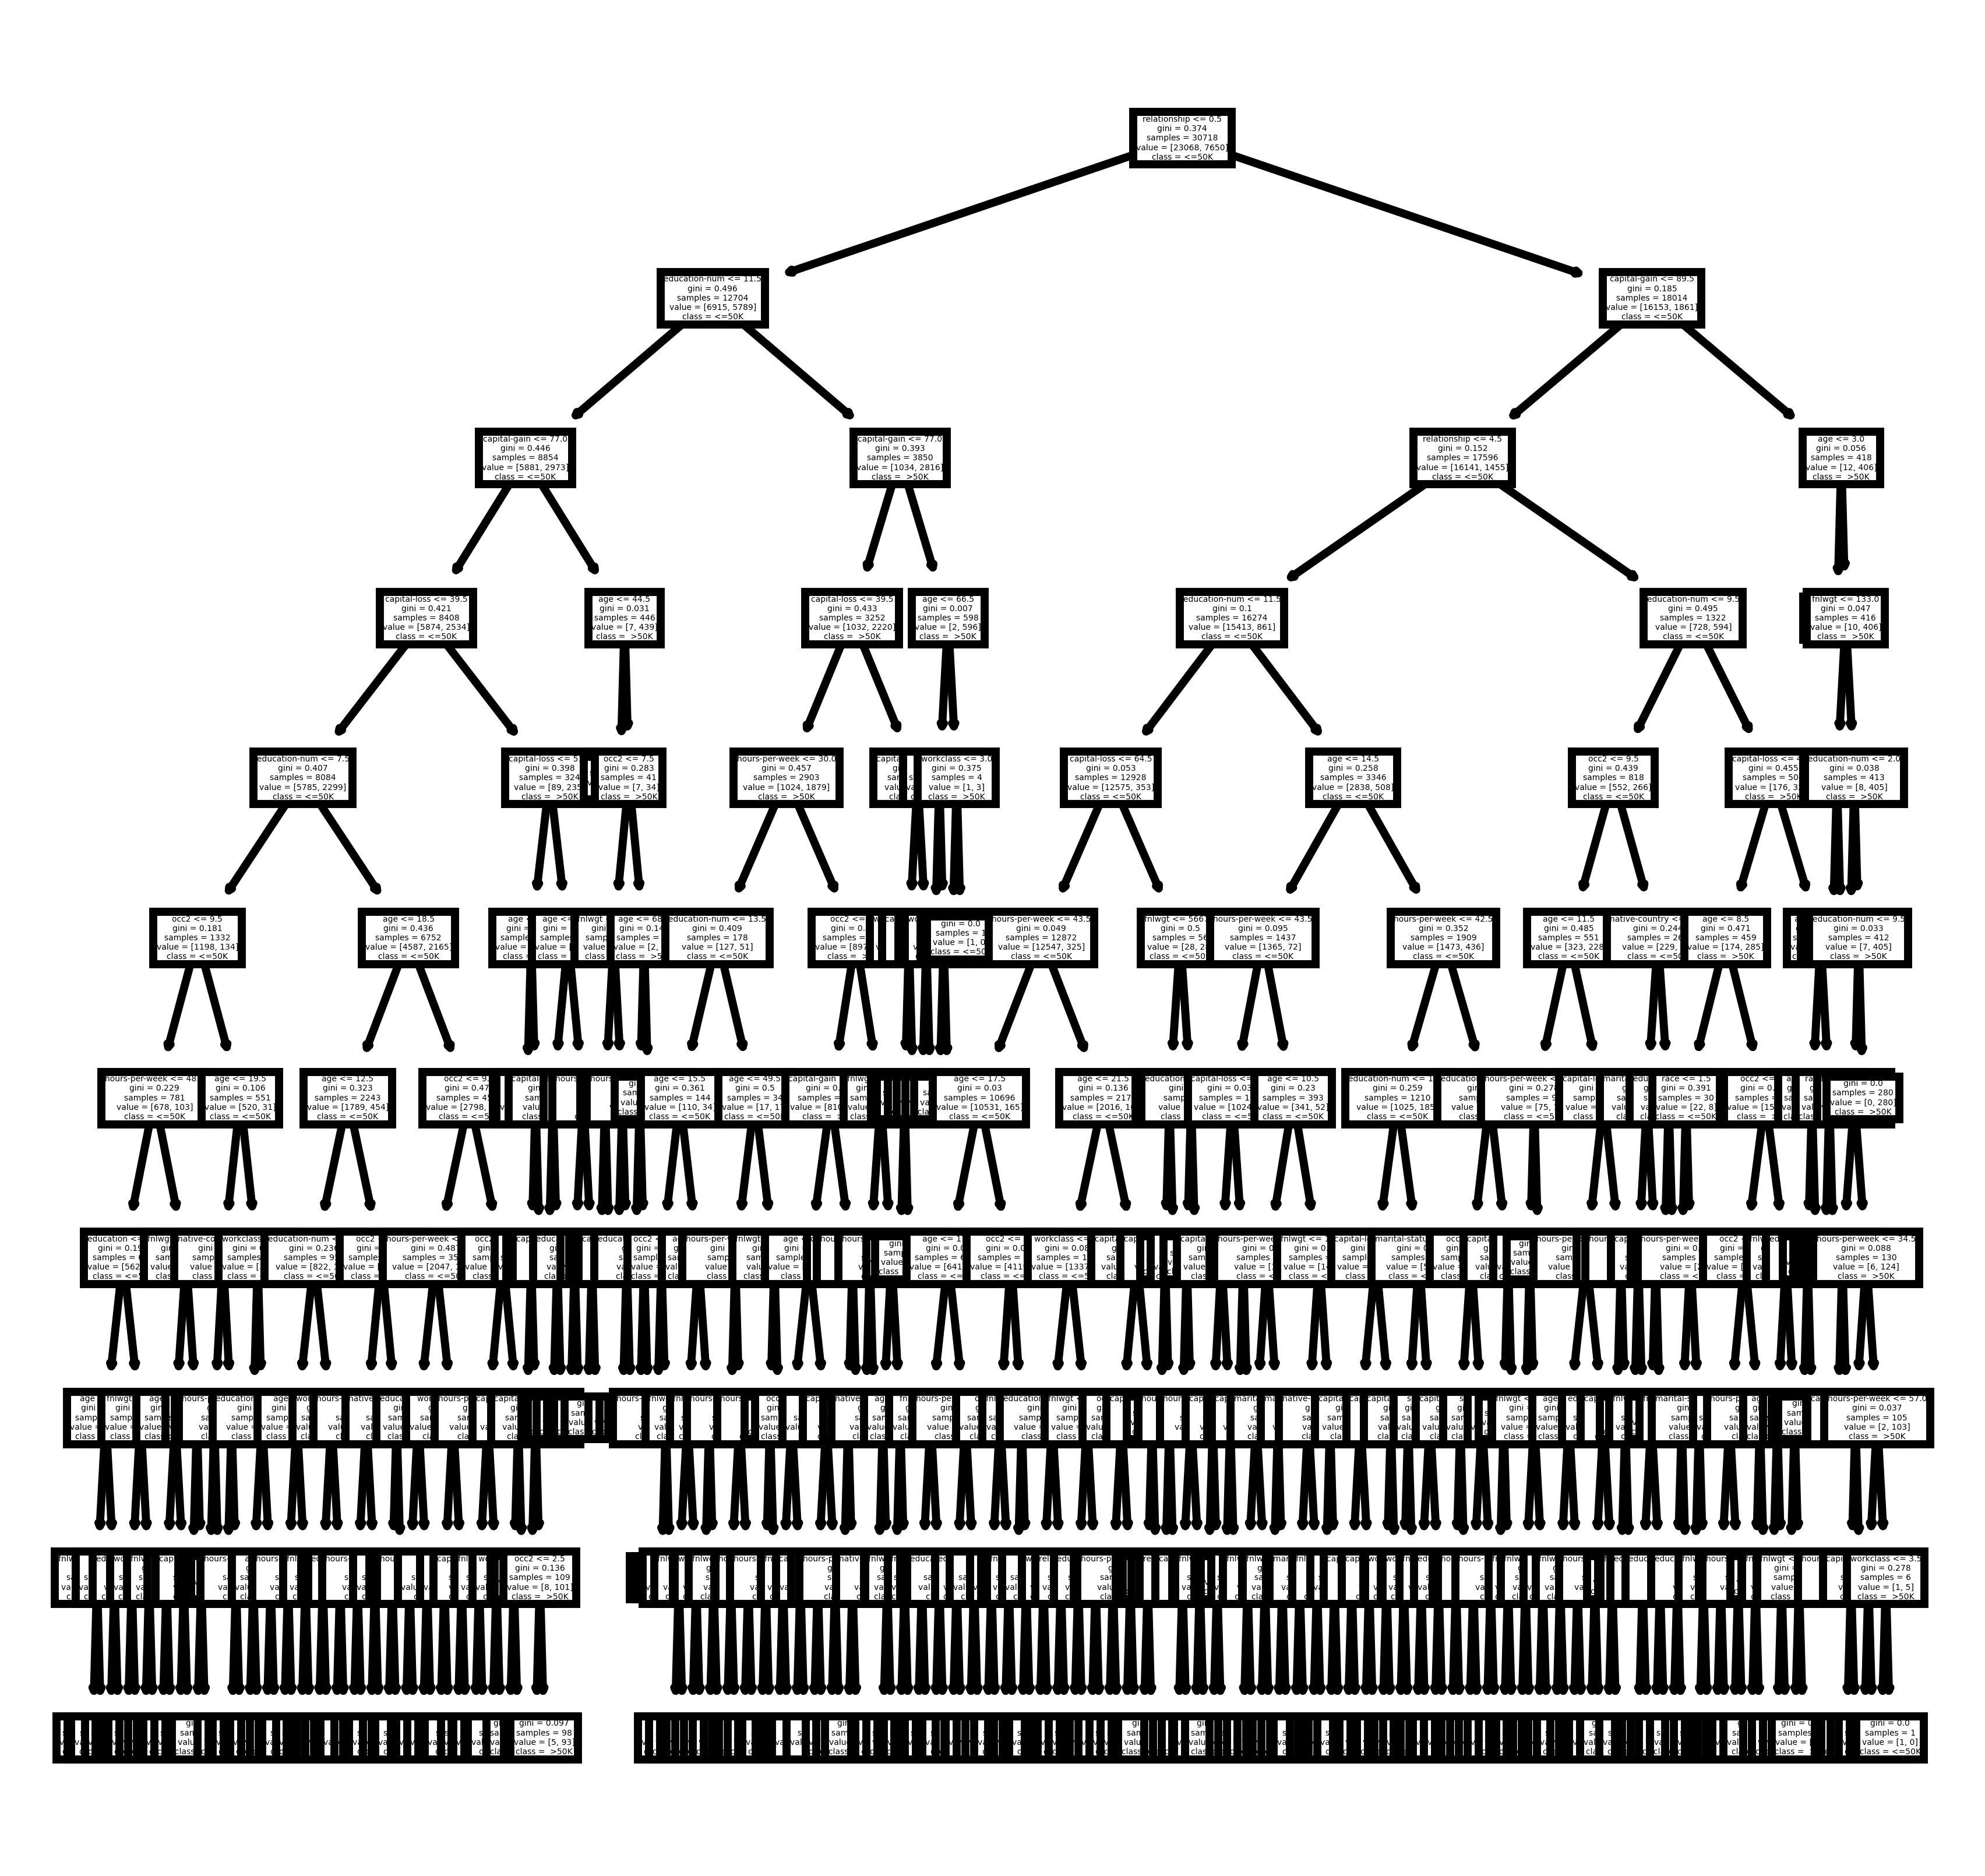

In [13]:
# Visualizing the decision tree with the schema
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(grid_search.best_estimator_,
               feature_names = X_train.columns, 
               class_names= ['<=50K',' >50K']);


[Text(202.79267578125, 207.55636363636364, 'relationship <= 0.5\ngini = 0.374\nsamples = 30718\nvalue = [23068, 7650]\nclass = <=50K'),
 Text(115.74140625, 187.7890909090909, 'education-num <= 11.5\ngini = 0.496\nsamples = 12704\nvalue = [6915, 5789]\nclass = <=50K'),
 Text(81.02149939903846, 168.0218181818182, 'capital-gain <= 77.0\ngini = 0.446\nsamples = 8854\nvalue = [5881, 2973]\nclass = <=50K'),
 Text(62.649248798076925, 148.25454545454545, 'capital-loss <= 39.5\ngini = 0.421\nsamples = 8408\nvalue = [5874, 2534]\nclass = <=50K'),
 Text(39.78768028846154, 128.48727272727274, 'education-num <= 7.5\ngini = 0.407\nsamples = 8084\nvalue = [5785, 2299]\nclass = <=50K'),
 Text(20.22079326923077, 108.72, 'occ2 <= 9.5\ngini = 0.181\nsamples = 1332\nvalue = [1198, 134]\nclass = <=50K'),
 Text(12.273317307692308, 88.95272727272729, 'hours-per-week <= 48.5\ngini = 0.229\nsamples = 781\nvalue = [678, 103]\nclass = <=50K'),
 Text(6.438461538461539, 69.18545454545455, 'education <= 4.5\ngini =

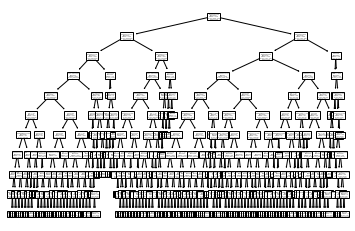

In [14]:
# Printing the tree schema in text form
tree.plot_tree(grid_search.best_estimator_,feature_names = X_train.columns, 
               class_names= ['<=50K',' >50K'] ,)